In [1]:
    from typing import final

import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader.data as data
from keras.src.metrics.accuracy_metrics import accuracy
from tensorflow.python.keras.models import save_model

In [2]:
import matplotlib.pyplot as plt

In [3]:
start = '2010-01-01'
end = '2024-12-31'
df = yf.download('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.447412,6.462174,6.398306,6.429939,493729600
2010-01-05,6.458559,6.495012,6.424516,6.465187,601904800
2010-01-06,6.355828,6.484168,6.349200,6.458560,552160000
2010-01-07,6.344077,6.386858,6.297983,6.379326,477131200
2010-01-08,6.386256,6.386859,6.298287,6.335643,447610800


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700
2024-12-26,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,258.700012,253.059998,257.829987,42355300
2024-12-30,252.199997,253.500000,250.750000,252.229996,35557500


In [5]:
df = df.reset_index()

In [6]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.447412,6.462174,6.398306,6.429939,493729600
1,2010-01-05,6.458559,6.495012,6.424516,6.465187,601904800
2,2010-01-06,6.355828,6.484168,6.349200,6.458560,552160000
3,2010-01-07,6.344077,6.386858,6.297983,6.379326,477131200
4,2010-01-08,6.386256,6.386859,6.298287,6.335643,447610800


In [7]:
df = df.drop(['Date'], axis=1)
df.head()

C:\Users\logri\AppData\Local\Temp\ipykernel_15020\112913868.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.447412,6.462174,6.398306,6.429939,493729600
1,6.458559,6.495012,6.424516,6.465187,601904800
2,6.355828,6.484168,6.349200,6.458560,552160000
3,6.344077,6.386858,6.297983,6.379326,477131200
4,6.386256,6.386859,6.298287,6.335643,447610800


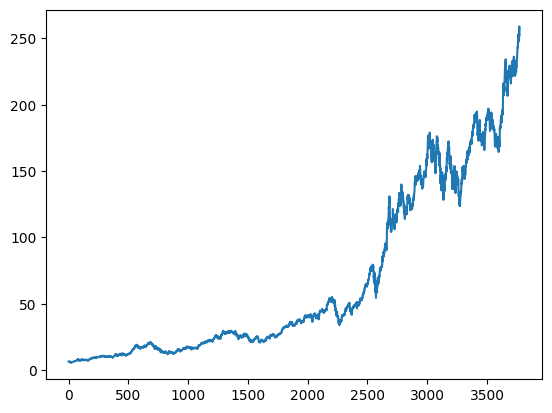

In [11]:
plt.plot(df['Close'])

In [12]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.447412,6.462174,6.398306,6.429939,493729600
1,6.458559,6.495012,6.424516,6.465187,601904800
2,6.355828,6.484168,6.349200,6.458560,552160000
3,6.344077,6.386858,6.297983,6.379326,477131200
4,6.386256,6.386859,6.298287,6.335643,447610800
...,...,...,...,...,...
3768,255.270004,255.649994,253.449997,254.770004,40858800
3769,258.200012,258.209991,255.289993,255.490005,23234700
3770,259.019989,260.100006,257.630005,258.190002,27237100


In [13]:
ma100 = df['Close'].rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,229.221354
3769,229.609709
3770,230.111926
3771,230.600197


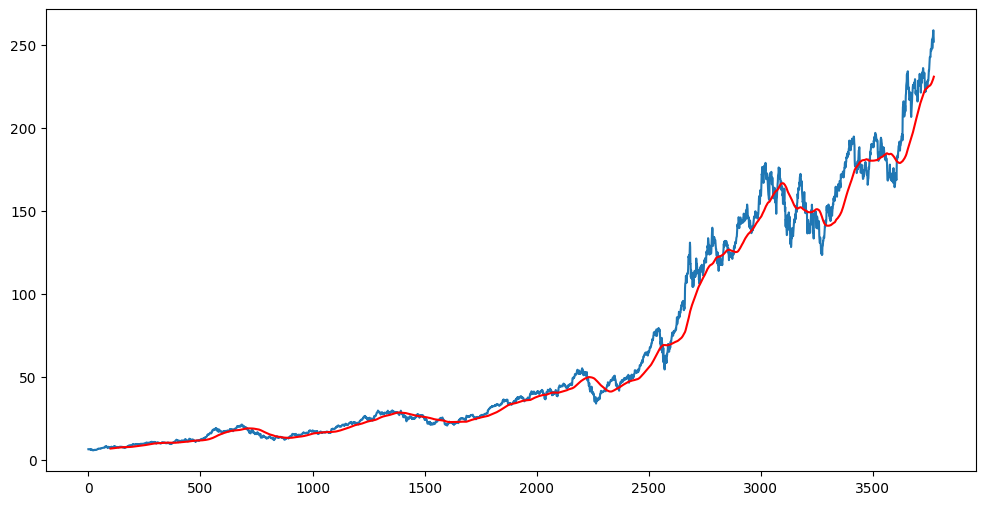

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [15]:
ma200 = df['Close'].rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,210.984397
3769,211.414761
3770,211.846834
3771,212.272219


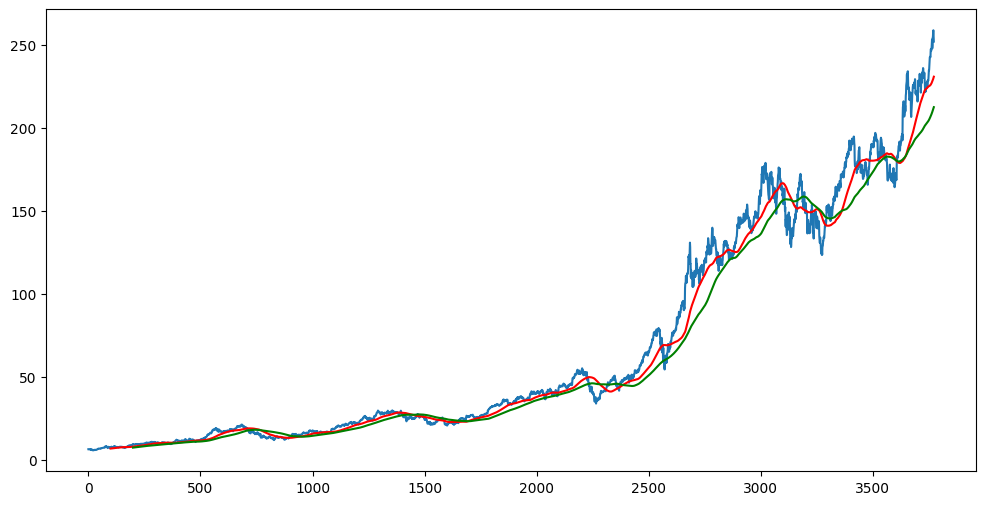

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(3773, 5)

In [18]:
#Splitting data
data_training = pd.DataFrame(df['Close'][:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2641, 1)
(1132, 1)


In [19]:
data_training.head()

Ticker,AAPL
0,6.447412
1,6.458559
2,6.355828
3,6.344077
4,6.386256


In [20]:
data_testing.head()

Ticker,AAPL
2641,88.698471
2642,88.698471
2643,91.071182
2644,90.788589
2645,92.903069


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [22]:
data_training_scaled = scaler.fit_transform(data_training)

In [23]:
data_training_scaled

array([[0.00792294],
       [0.00805643],
       [0.00682615],
       ...,
       [0.9623664 ],
       [0.98614264],
       [0.99495303]])

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_scaled.shape[0]):
    x_train.append(data_training_scaled[i-100:i])
    y_train.append(data_training_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(2541, 100, 1)

In [26]:
#ML Model

In [27]:
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()

model.add(LSTM(units = 50,activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



C:\Users\logri\Documents\Python Scripts\StockPredictionApp\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 1.6252e-04 - loss: 0.0378
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 5.0635e-05 - loss: 0.0047
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 5.6068e-05 - loss: 0.0036
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 3.6687e-04 - loss: 0.0037
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 1.5538e-04 - loss: 0.0028
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.0011 - loss: 0.0032
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 4.0548e-04 - loss: 0.0027
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 1.0876e-04 - loss: 0.0029
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 7.2845e-05 - loss: 0.0023
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 1.1508e-04 - loss: 0.0024
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 6.1580e-05 - loss: 0.0022
Epoch 

In [32]:
save_model = model.save('my_model.h5')


In [33]:
data_testing.head()

Ticker,AAPL
2641,88.698471
2642,88.698471
2643,91.071182
2644,90.788589
2645,92.903069


In [34]:
past_100_days = data_training.tail(100)

In [35]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [36]:
final_df.head()

Ticker,AAPL
0,77.749954
1,78.119225
2,77.647919
3,79.491882
4,78.925812


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11363834],
       [0.11544397],
       [0.11313941],
       ...,
       [1.        ],
       [0.98322826],
       [0.96665208]])

In [38]:
input_data.shape

(1232, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [40]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1132, 100, 1)
(1132,)


In [41]:
# Making prediction

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [42]:
y_pred.shape

(1132, 1)

In [43]:
y_test

array([0.16717364, 0.16717364, 0.17877556, ..., 1.        , 0.98322826,
       0.96665208])

In [44]:
y_pred

array([[0.19247687],
       [0.19437753],
       [0.19606027],
       ...,
       [0.93534875],
       [0.9385139 ],
       [0.94220483]], dtype=float32)

In [45]:
scaler.scale_

array([0.00488973])

In [46]:
scaler_factor = 1/0.00488973
y_pred = y_pred * scaler_factor
y_test = y_test * scaler_factor

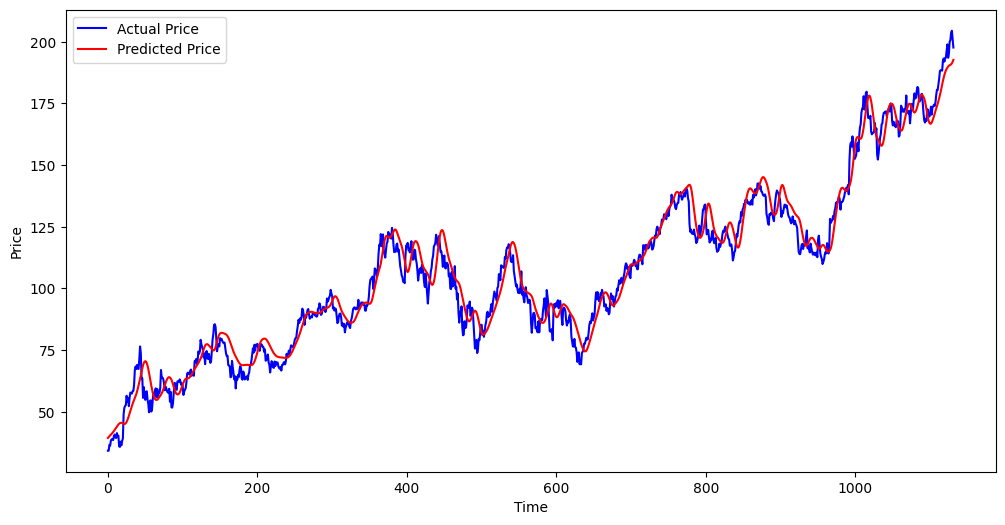

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'Actual Price')
plt.plot(y_pred,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()